# Ultimatly this code will hopefully be able to predict whether a protein is likely to be secreted via the Sec or Tat system, or not secreted at all, based on the protein sequence input 

## Section one

In the first section of the code the data needs to be downloaded and sorted into sequences that are secreted by Sec, secreted by Tat or not secreted 

**Step one**: Read in protein sequences from the protein database, that have been filtered to contain a signal sequence (a feature of secreted proteins) and are present in *E. coli* (my organism of interest). This data should contain the entry and the sequence of the respective protieins

In [95]:
import pandas as pd

df1 = pd.read_csv("https://raw.githubusercontent.com/DHavers/Python-Assignment/main/231215_ecoli_signalseq.csv")
print(df1)

      Entry                                           Sequence
0    P00634  MKQSTIALALLPLLFTPVTKARTPEMPVLENRAAQGDITAPGGARR...
1    P00805  MEFFKKTALAALVMGFSGAALALPNITILATGGTIAGGGDSATKSN...
2    P00811  MFKTTLCALLITASCSTFAAPQQINDIVHRTITPLIEQQKIPGMAV...
3    P02925  MNMKKLATLVSAVALSATVSANAMAKDTIALVVSTLNNPFFVSLKD...
4    P02930  MKKLLPILIGLSLSGFSSLSQAENLMQVYQQARLSNPELRKSAADR...
..      ...                                                ...
508  Q47702  MKKIICLVITLLMTLPVYAKLTAHEEARINAMLEGLAQKKDLIFVR...
509  Q6BEX5  MKRFPLFLLFTLLTLSTVPAQADIIDDTIGNIQQAINDAYNPDRGR...
510  Q9JMR4  MCPECFFLMLFFCGYRACYCSSSFSSSSSSSSSSSFRSSPAYGFSG...
511  Q9JMR5  MCCVYRMNRPASGLTVVFCGKLSGKPGPKSAAWRMPWQKSGADDGG...
512  Q9JMT5  MFNRRVLFLSVFSCAVFMLSGCSSNRFASRDANATYVNTQLKIIPR...

[513 rows x 2 columns]


**Step two:** Create a column containing the first 30 amino acids (aa) - this is the signal sequence of the secreted proteins, so they can then be investigated to catagorise the proteins secretion system in Step three.

In [96]:
# I am defining a function to select the first 30aa in each sequence

def signal_seq(sequence):
    """
    Count the fist 30 amino acids in the given sequence.
    """
    return sequence[:30] if len(sequence) >= 30 else sequence
   
signal_seq_list = []

# I am adding the signal sequence of each protein into a new column on the dataframe

for i in range(df1['Entry'].count()):
    # print(df.loc[i,'Entry'])
    signal_seq_list.append(signal_seq(df1.loc[i,'Sequence']))

df1['Signal seq'] = signal_seq_list


print(df1)

      Entry                                           Sequence  \
0    P00634  MKQSTIALALLPLLFTPVTKARTPEMPVLENRAAQGDITAPGGARR...   
1    P00805  MEFFKKTALAALVMGFSGAALALPNITILATGGTIAGGGDSATKSN...   
2    P00811  MFKTTLCALLITASCSTFAAPQQINDIVHRTITPLIEQQKIPGMAV...   
3    P02925  MNMKKLATLVSAVALSATVSANAMAKDTIALVVSTLNNPFFVSLKD...   
4    P02930  MKKLLPILIGLSLSGFSSLSQAENLMQVYQQARLSNPELRKSAADR...   
..      ...                                                ...   
508  Q47702  MKKIICLVITLLMTLPVYAKLTAHEEARINAMLEGLAQKKDLIFVR...   
509  Q6BEX5  MKRFPLFLLFTLLTLSTVPAQADIIDDTIGNIQQAINDAYNPDRGR...   
510  Q9JMR4  MCPECFFLMLFFCGYRACYCSSSFSSSSSSSSSSSFRSSPAYGFSG...   
511  Q9JMR5  MCCVYRMNRPASGLTVVFCGKLSGKPGPKSAAWRMPWQKSGADDGG...   
512  Q9JMT5  MFNRRVLFLSVFSCAVFMLSGCSSNRFASRDANATYVNTQLKIIPR...   

                         Signal seq  
0    MKQSTIALALLPLLFTPVTKARTPEMPVLE  
1    MEFFKKTALAALVMGFSGAALALPNITILA  
2    MFKTTLCALLITASCSTFAAPQQINDIVHR  
3    MNMKKLATLVSAVALSATVSANAMAKDTIA  
4    MKKLLPILIGLS

**Step three:** Search these signal sequences for the "RR" motif which is a known feature present in the signal sequences of protiens secreted by the Tat system. So if it is present the proteins secreteion system will be catagorised as tat and if that sequence motif isnt there catagorise as Sec (as these are the two secretion systems in *E.coli*

In [97]:
# First, define a function that can count if "RR" is present in the singal sequence, and use this information to catagorise the secretion sysetm

def RR_motif(signal_seq_list):
    """
    Identify if "RR" is in the sequence 
    """
    if signal_seq_list.count("RR") == 1:
        return "tat"
    else:
        return "sec"
    
print(RR_motif)

RR_motif_list = []

# Create a new column in the data frame that will contain the information about the secretion system for each protein

for i in range(df1['Entry'].count()):
    signal_sequence = df1.loc[i, 'Signal seq']
    
    system_label = RR_motif(signal_sequence)
    
    RR_motif_list.append(system_label)

df1['Secretion system'] = RR_motif_list

print(df1)


<function RR_motif at 0x1373faac0>
      Entry                                           Sequence  \
0    P00634  MKQSTIALALLPLLFTPVTKARTPEMPVLENRAAQGDITAPGGARR...   
1    P00805  MEFFKKTALAALVMGFSGAALALPNITILATGGTIAGGGDSATKSN...   
2    P00811  MFKTTLCALLITASCSTFAAPQQINDIVHRTITPLIEQQKIPGMAV...   
3    P02925  MNMKKLATLVSAVALSATVSANAMAKDTIALVVSTLNNPFFVSLKD...   
4    P02930  MKKLLPILIGLSLSGFSSLSQAENLMQVYQQARLSNPELRKSAADR...   
..      ...                                                ...   
508  Q47702  MKKIICLVITLLMTLPVYAKLTAHEEARINAMLEGLAQKKDLIFVR...   
509  Q6BEX5  MKRFPLFLLFTLLTLSTVPAQADIIDDTIGNIQQAINDAYNPDRGR...   
510  Q9JMR4  MCPECFFLMLFFCGYRACYCSSSFSSSSSSSSSSSFRSSPAYGFSG...   
511  Q9JMR5  MCCVYRMNRPASGLTVVFCGKLSGKPGPKSAAWRMPWQKSGADDGG...   
512  Q9JMT5  MFNRRVLFLSVFSCAVFMLSGCSSNRFASRDANATYVNTQLKIIPR...   

                         Signal seq Secretion system  
0    MKQSTIALALLPLLFTPVTKARTPEMPVLE              sec  
1    MEFFKKTALAALVMGFSGAALALPNITILA              sec  
2    MF

**Step four:** Now an additional dataframe will be downloaded also from the protein database, this time filtered for *E.coli* proteins that do not contain signal sequences (and therefore are not secreted) 

In [98]:
df2 = pd.read_csv("https://raw.githubusercontent.com/DHavers/Python-Assignment/main/231215_all_ecoli_proteins.csv")
print(df2)

       Entry                                           Sequence
0     A5A616                    MLGNMNVFMAVLGIILFSGFLAAYFSHKWDD
1     O32583  MQILFNDQAMQCAAGQTVHELLEQLDQRQAGAALAINQQIVPREQW...
2     P00350  MSKQQIGVVGMAVMGRNLALNIESRGYTVSIFNRSREKTEEVIAEN...
3     P00363  MQTFQADLAIVGAGGAGLRAAIAAAQANPNAKIALISKVYPMRSHT...
4     P00370  MDQTYSLESFLNHVQKRDPNQTEFAQAVREVMTTLWPFLEQNPKYR...
...      ...                                                ...
4585  Q9S4X4  MPFDLLTVLFTRLDVEVNGFNGGVLNGVPSAYHWYTEQYGVKGPCG...
4586  Q9S4X5  MPNWCSNRMYFSGEPAQIAEIKRLASGAVTPLYRRATNEGIQLFLA...
4587  Q9XB42  MKIISKRRAMTIYRQHPESRIFRYCTGKYQWHGSVCHYTGRDVPDI...
4588  Q9Z3A0  MIRKNKWLRFQTVCRYIPLSLKNHNRLVIFVCQRIEWRYIFSTNTG...
4589  V9HVX0  MTIAERLRQEGHQIGWQEGKLEGLHEQAIKIALRMLEQGFDRDQVL...

[4590 rows x 2 columns]


**Step five:** Now these dataframes need to be combined into a single dataframe that does not contain any protein duplicates so that later in the code a single dataframe containing all the proteins can be used 

In [99]:
# Merge dataframes on multiple columns ('sequence' and 'entry')
merged_df = pd.merge(df1, df2, on=['Entry','Sequence'], how='outer', indicator=True)

# Filter out the rows that have a match in both df and df2
unique_rows = merged_df[merged_df['_merge'] == 'both'].drop(columns=['_merge'])

# Change the "NaN" to "N/A" (for the proitens that are not secreted) so this can be used as a catagory later
merged_df["Secretion system"] = merged_df["Secretion system"].fillna('N/A')

# Tidy up what the dataframe looks like
merged_df.drop(['Signal seq','_merge'], axis=1, inplace=True)
df = merged_df
df

,Entry,Sequence,Secretion system
0,P00634,MKQSTIALALLPLLFTPVTKARTPEMPVLENRAAQGDITAPGGARR...,sec
1,P00805,MEFFKKTALAALVMGFSGAALALPNITILATGGTIAGGGDSATKSN...,sec
2,P00811,MFKTTLCALLITASCSTFAAPQQINDIVHRTITPLIEQQKIPGMAV...,sec
3,P02925,MNMKKLATLVSAVALSATVSANAMAKDTIALVVSTLNNPFFVSLKD...,sec
4,P02930,MKKLLPILIGLSLSGFSSLSQAENLMQVYQQARLSNPELRKSAADR...,sec
...,...,...,...
4585,Q9S4X4,MPFDLLTVLFTRLDVEVNGFNGGVLNGVPSAYHWYTEQYGVKGPCG...,N/A
4586,Q9S4X5,MPNWCSNRMYFSGEPAQIAEIKRLASGAVTPLYRRATNEGIQLFLA...,N/A
4587,Q9XB42,MKIISKRRAMTIYRQHPESRIFRYCTGKYQWHGSVCHYTGRDVPDI...,N/A
4588,Q9Z3A0,MIRKNKWLRFQTVCRYIPLSLKNHNRLVIFVCQRIEWRYIFSTNTG...,N/A


Now I have a dataframe containing lots of *E. coli* protein sequences catagorised by their secretion system

# Section two:

In the second section of this code we will investigate weather the amino acid composition of a protein may influence if and via what system the protein is secreted 

**Step one:** Investigate the proteins amino acid composition using libraries and newly defined functions

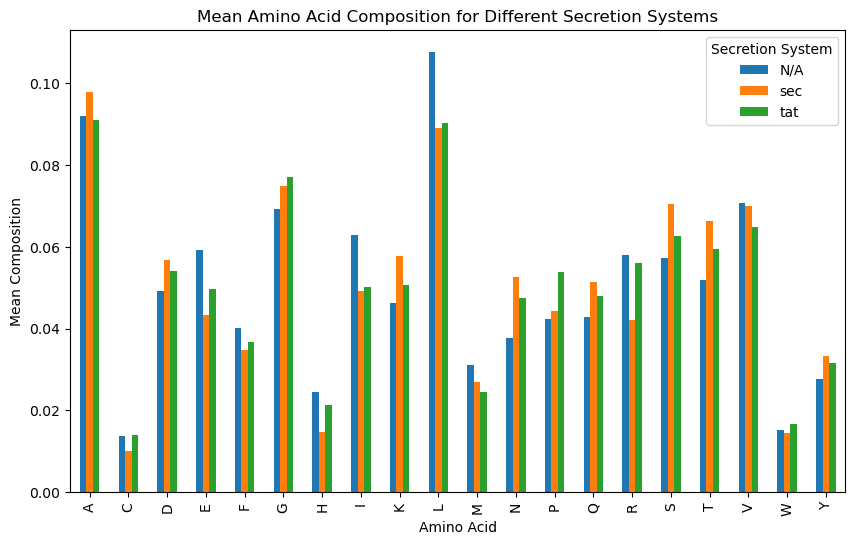

In [100]:
import matplotlib.pyplot as plt
from Bio.SeqUtils import ProtParam

# Define a function to calculate amino acid composition
def calculate_amino_acid_composition(sequence):
    analyser = ProtParam.ProteinAnalysis(str(sequence))
    return analyser.get_amino_acids_percent()

# Calculate amino acid composition for each sequence
df['Amino Acid Composition'] = df['Sequence'].apply(calculate_amino_acid_composition)

# Convert the 'Amino Acid Composition' column into a dataframe
amino_acid_df = pd.DataFrame(df['Amino Acid Composition'].tolist(), index=df.index)

# Combine the 'Secretion system' column with the amino acid composition dataframe
combined_df = pd.concat([df['Secretion system'], amino_acid_df], axis=1)

# Group by 'Secretion system' and calculate the mean composition for each group
grouped_df = combined_df.groupby('Secretion system').mean()

# Plot the composition of all amino acids for each secretion system
grouped_df.T.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Amino Acid')
plt.ylabel('Mean Composition')
plt.title('Mean Amino Acid Composition for Different Secretion Systems')
plt.legend(title='Secretion System')
plt.show()

There appears to be some differences between the amino acid composition of the different catagories so next we can develop a model to use the amino acid composition of the sequence to predict the protein secretion system

**Step two:** Use this to create a model using a Random Forrest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Feature matrix X (amino acid composition) and target variable y (Secreted)
X = pd.DataFrame(list(df['Amino Acid Composition']))
y = df['Secretion system']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train a RandomForest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9172473867595818


**Step three:** Trying to understand what is important for this model to make its predictions 

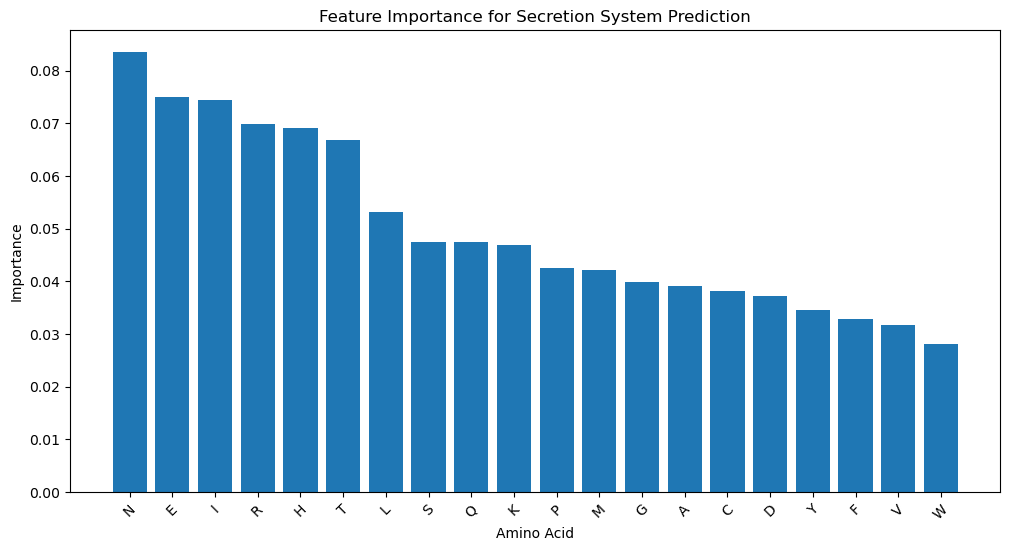

In [105]:
# Train a RandomForest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = classifier.feature_importances_

# Create a dataframe to display feature importances
importance_df = pd.DataFrame({'Amino Acid': amino_acid_df.columns, 'Importance': feature_importances})

# Sort the dataframe by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Amino Acid'], importance_df['Importance'])
plt.xlabel('Amino Acid')
plt.ylabel('Importance')
plt.title('Feature Importance for Secretion System Prediction')
plt.xticks(rotation=45)
plt.show()

**Step four:** To understand this representation more intuitivly it would be good to visully represent certain catagorise of amino acids

In [106]:
# Create a dictionary of amino acid categories with one-letter codes
amino_acid_categories = {
    'Positively charged': ['K', 'R', 'H'],
    'Negatively charged': ['D', 'E'],
    'Uncharged': ['S', 'T', 'N', 'Q'],
    'Hydrophobic': ['A', 'V', 'L', 'I', 'M', 'F', 'W', 'Y'],
    'Special cases': ['C', 'G', 'P'],
}

# Mapping of one-letter codes to full names
amino_acid_names = {
    'S': 'Serine', 'T': 'Threonine', 'Y': 'Tyrosine', 'N': 'Asparagine', 'Q': 'Glutamine',
    'A': 'Alanine', 'V': 'Valine', 'L': 'Leucine', 'I': 'Isoleucine', 'M': 'Methionine',
    'D': 'Aspartic Acid', 'E': 'Glutamic Acid',
    'K': 'Lysine', 'R': 'Arginine', 'H': 'Histidine',
    'F': 'Phenylalanine', 'W': 'Tryptophan',
    'C': 'Cysteine', 'G': 'Glycine', 'P': 'Proline',
}

# Print the amino acid categories
for category, amino_acids in amino_acid_categories.items():
    full_names = [amino_acid_names[code] for code in amino_acids]
    print(f'{category} Amino Acids ({", ".join(amino_acids)}): {", ".join(full_names)}')

Positively charged Amino Acids (K, R, H): Lysine, Arginine, Histidine
Negatively charged Amino Acids (D, E): Aspartic Acid, Glutamic Acid
Uncharged Amino Acids (S, T, N, Q): Serine, Threonine, Asparagine, Glutamine
Hydrophobic Amino Acids (A, V, L, I, M, F, W, Y): Alanine, Valine, Leucine, Isoleucine, Methionine, Phenylalanine, Tryptophan, Tyrosine
Special cases Amino Acids (C, G, P): Cysteine, Glycine, Proline


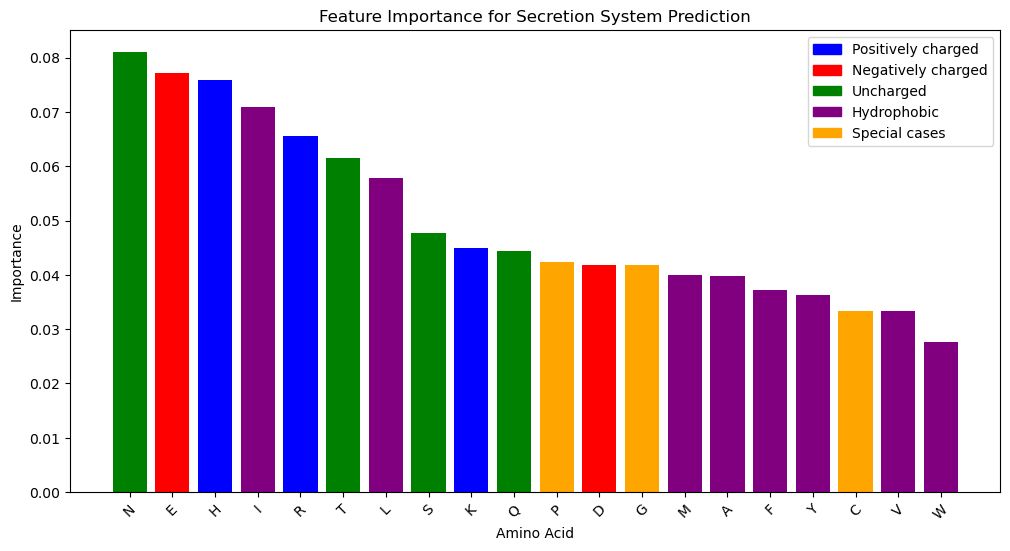

In [110]:
import seaborn as sns

# Assign colours to each amino acid category
category_colours = {
    'Positively charged': 'blue',
    'Negatively charged': 'red',
    'Uncharged': 'green',
    'Hydrophobic': 'purple',
    'Special cases': 'orange',
}

# Use the same code as in section two
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

feature_importances = classifier.feature_importances_

importance_df = pd.DataFrame({'Amino Acid': amino_acid_df.columns, 'Importance': feature_importances})

# Then map amino acids to their categories
importance_df['Category'] = importance_df['Amino Acid'].apply(
    lambda amino_acid: next(category for category, acids in amino_acid_categories.items() if amino_acid in acids)
)

# And then map categories to colours
importance_df['Colour'] = importance_df['Category'].map(category_colours)

# Sort the dataframe by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances with coloured bars
plt.figure(figsize=(12, 6))
bars = plt.bar(importance_df['Amino Acid'], importance_df['Importance'], color=importance_df['Colour'])

# Add legend
legend_labels = [(category, colour) for category, colour in category_colours.items()]
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=colour, label=label) for label, colour in legend_labels], loc='upper right')

plt.xlabel('Amino Acid')
plt.ylabel('Importance')
plt.title('Feature Importance for Secretion System Prediction')
plt.xticks(rotation=45)
plt.show()

This suggests hydrophobic amino acids are not very important when making these predicrions, and therefore suggesting they are not very improtant in determining a protiens secretion system, along with the special case amino acids. 

This will be useful when designing protein constructs to use in the lab with the different protien secretion systems, and these sequences can be inputed to the model which can predict if the sequences are likely to be secreted via the system they are designed for or not. 

# Section three:

In section three we are going to use the model to make a prediction based off a sequence I have designed in the lab that is intended for secretion via the Sec system. 

**Step one:** Input a lab sequence of interest 

In [111]:
import numpy as np

# Using a lab sequence 
lab_sequence = "MGRKLTALFVASTLALGAANLAHAADTTTAAPADAKPMMHHKGKFGPHQDMMFKDLNLTDAQKQQIREIMKGQRDQMKRPPLEERRAMHDIIASDTFDKVKAEAQIAKMEEQRKANMLAHMETQNKIYNILTPEQKKQFNANFEKRLTERPAAKGKMPATAE"

# Calculate amino acid composition for the new sequence
new_amino_acid_composition = calculate_amino_acid_composition(lab_sequence)

# Create a dataframe for the new sequence
lab_sequence_df = pd.DataFrame([new_amino_acid_composition])

# Use the trained RandomForest classifier to predict the secretion system
predicted_secretion_system = classifier.predict(lab_sequence_df)

print(f"Predicted Secretion System: {predicted_secretion_system[0]}")

Predicted Secretion System: sec


You can now use this output of the Predicted Secretion System to inform on if this protein design is worth progressing through to production. 